In [1]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import odf
import math
import pdfkit
import scipy.constants as const
from itertools import chain
from statistics import mean
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.umath import *
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, minimize_scalar
from lmfit.models import LorentzianModel
from IPython.display import display, Latex
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Calibration of magnetic field

In [2]:
I = [0, 0.4, 0.98, 1.67, 2.28, 3.22, 3.93, 4.54, 5.14, 5.48, 6.40, 6.92, 7.38, 7.86, 8.29, 9.16]
B = [8, 30, 64, 105, 143, 200, 245, 283, 320, 342, 398, 428, 455, 489, 509,556]
ib = pd.DataFrame(list(zip(I, B)),
              columns=['I','B'])
ib

I    B
0   0.00    8
1   0.40   30
2   0.98   64
3   1.67  105
4   2.28  143
5   3.22  200
6   3.93  245
7   4.54  283
8   5.14  320
9   5.48  342
10  6.40  398
11  6.92  428
12  7.38  455
13  7.86  489
14  8.29  509
15  9.16  556

In [3]:
X = np.array(I).reshape(-1, 1)
Y = np.array(B).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_

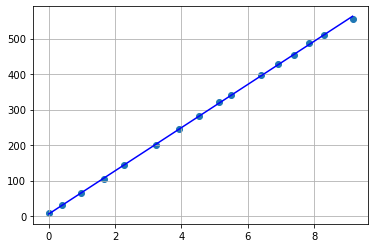

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
def magnetic_value(I):
    return (coef[0, 0] * I + intercept[0]) * 10**(-3)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.grid()
plt.show()
display(Latex("$R^2$ = {}".format(reg_value)))
display(Latex("$f(x) = {}x + {}$".format(coef[0, 0], intercept[0])))

In [5]:
def bohr_magneton(I, d):   
    t = 3 * (10**(-3)) # in meters
    h = const.h # Planck constant [SI]
    c = const.c # Speed of light [SI]
    B = magnetic_value(I) # in Tesla

    # calculate difference i.e. diameter, then radius, then calculate \Delta, \delta, and their averages
    d1 = d[: int(len(d)/2)]
    d2 = d[int(len(d)/2): ]
    dia_ = [(i - j) for i in d2 for j in reversed(d1)]
    dia = dia_[::9]
    rad = np.array(dia)/2
    rad_2 = np.square(rad)
    Delta = []
    for i in range(len(rad_2) - 2):
        Delta.append(rad_2[i+2] - rad_2[i])
    delta = []
    for i in range(0, len(rad_2) - 1, 2):
        delta.append(rad_2[i+1] - rad_2[i])
    Delta_useful = Delta[:2] + Delta[-2:]
    avg_Delta = np.mean(np.array(Delta_useful))
    avg_delta = np.mean(np.array(delta))
    wave_num = (1/(2 * t)) * (avg_delta/avg_Delta)
    bohr_mag = (h * c) * (wave_num/(2 * B))
    return bohr_mag

In [6]:
# zee = {'I': [],
#        'd': [[],
            
#     ]}
#bohr_magneton_values = []
# for i in range(5): 
#     bohr_magneton_values.append(bohr_magneton(zee['I'][i], zee['d'][i]))
# print(bohr_magneton_values)

In [7]:
a1 = [12, 13]
b1= [0, 0, 2, 3, 6, 7]
c1 = [8, 9, 12, 13]
d1 = [0, 0, 2, 3]
e1 = a1 + [(i+15) for i in b1] + [(i+30) for i in c1] + [(i+45) for i in d1]
f1 = [80, 34, 22, 94, 96, 80, 80, 88, 30, 40, 52, 46, 10, 78, 82, 40]
g1 = [(i/200) for i in f1]
h1 = np.array(np.array(e1) + np.array(g1))

In [8]:
I1 = 7.15
print(bohr_magneton(I1, h1))

8.88571774220382e-24


In [9]:
a2 = [14]
b2 = [0, 1, 2, 4, 5, 8, 9]
c2 = [9, 10, 11, 12, 13, 14]
d2 = [1, 2]
e2 = a2 + [(i+15) for i in b2] + [(i+30) for i in c2] + [(i+45) for i in d2]
f2 = [54, 26, 88, 72, 66, 78, 36, 80, 80, 52, 84, 96, 80, 60, 34, 8]
g2 = [(i/200) for i in f2]
h2 = np.array(np.array(e2) + np.array(g2))

In [10]:
I2 = 10.13
print(bohr_magneton(I2, h2))

9.395772001709701e-24


In [11]:
a3 = [0.5, 0.9, 2.9, 3.5, 4.78, 5.54, 8.58, 9.60, 26.6, 27.64, 30.32, 31.06, 33.26, 33.82, 35.78, 36.36]
b3 = [i/2 for i in a3]
I3 = 6.05
print(bohr_magneton(I3, b3))

9.794826009669065e-24


In [12]:
a4 = [0.06, 0.68, 2.50, 3.2, 5.38, 6.08, 8.98, 10.14, 27.04, 28.32, 30.80, 31.60, 33.74, 34.48, 36.38, 36.92]
b4 = [i/2 for i in a4]
I4 = 7.06
print(bohr_magneton(I4, b4))

x3 = [1] * 16
plt.figure(dpi=80)
b3 = [b3[i]-b3[0] for i in range(16)]
plt.scatter(x3, b3, marker='.')

x4 = [2] * 16
b4 = [b4[i]-b4[0] for i in range(16)]
plt.scatter(x4, b4, marker='.')

9.789695769304412e-24


In [13]:
a5 = [0.52, 0.96, 2.60, 3.34, 5.46, 6.28, 9, 10.46, 27, 28.32, 30.74, 31.68, 32.8, 33.58, 35.4, 35.9]
b5 = [i/2 for i in a5]
I5 = 7.97
print(bohr_magneton(I5, b5))

9.353279768872822e-24


In [14]:
a6 = [0.36, 0.94, 2.54, 3.34, 5.44, 6.4, 8.96, 10.4, 27.96, 29.56, 31.86, 32.78, 34.82, 35.74, 37.42, 38.08]
b6 = [i/2 for i in a6]
I6 = 9.07
print(bohr_magneton(I6, b6))

9.387656254408147e-24


In [15]:
a7 = [0.74, 0.9, 3.16, 4, 5.94, 6.98, 9.6, 11.1, 27.7, 29.24, 31.64, 32.64, 34.56, 35.38, 37.18, 37.92]
b7 = [i/2 for i in a7]
I7 = 10
print(bohr_magneton(I7, b7))

NameError: name 'a' is not defined